# Dengue Prediction System by using Machine Learning For SriLanka

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import pandas as pd

In [2]:
dengue_dataset = pd.read_csv("DataSet.csv")
dengue_dataset.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(dengue_dataset)

4920

In [4]:
from sklearn.model_selection import train_test_split

training_set, test_set = train_test_split(dengue_dataset, test_size=0.2, random_state=42) 

In [5]:
training_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1807,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Plot training dataset

<Figure size 640x480 with 0 Axes>

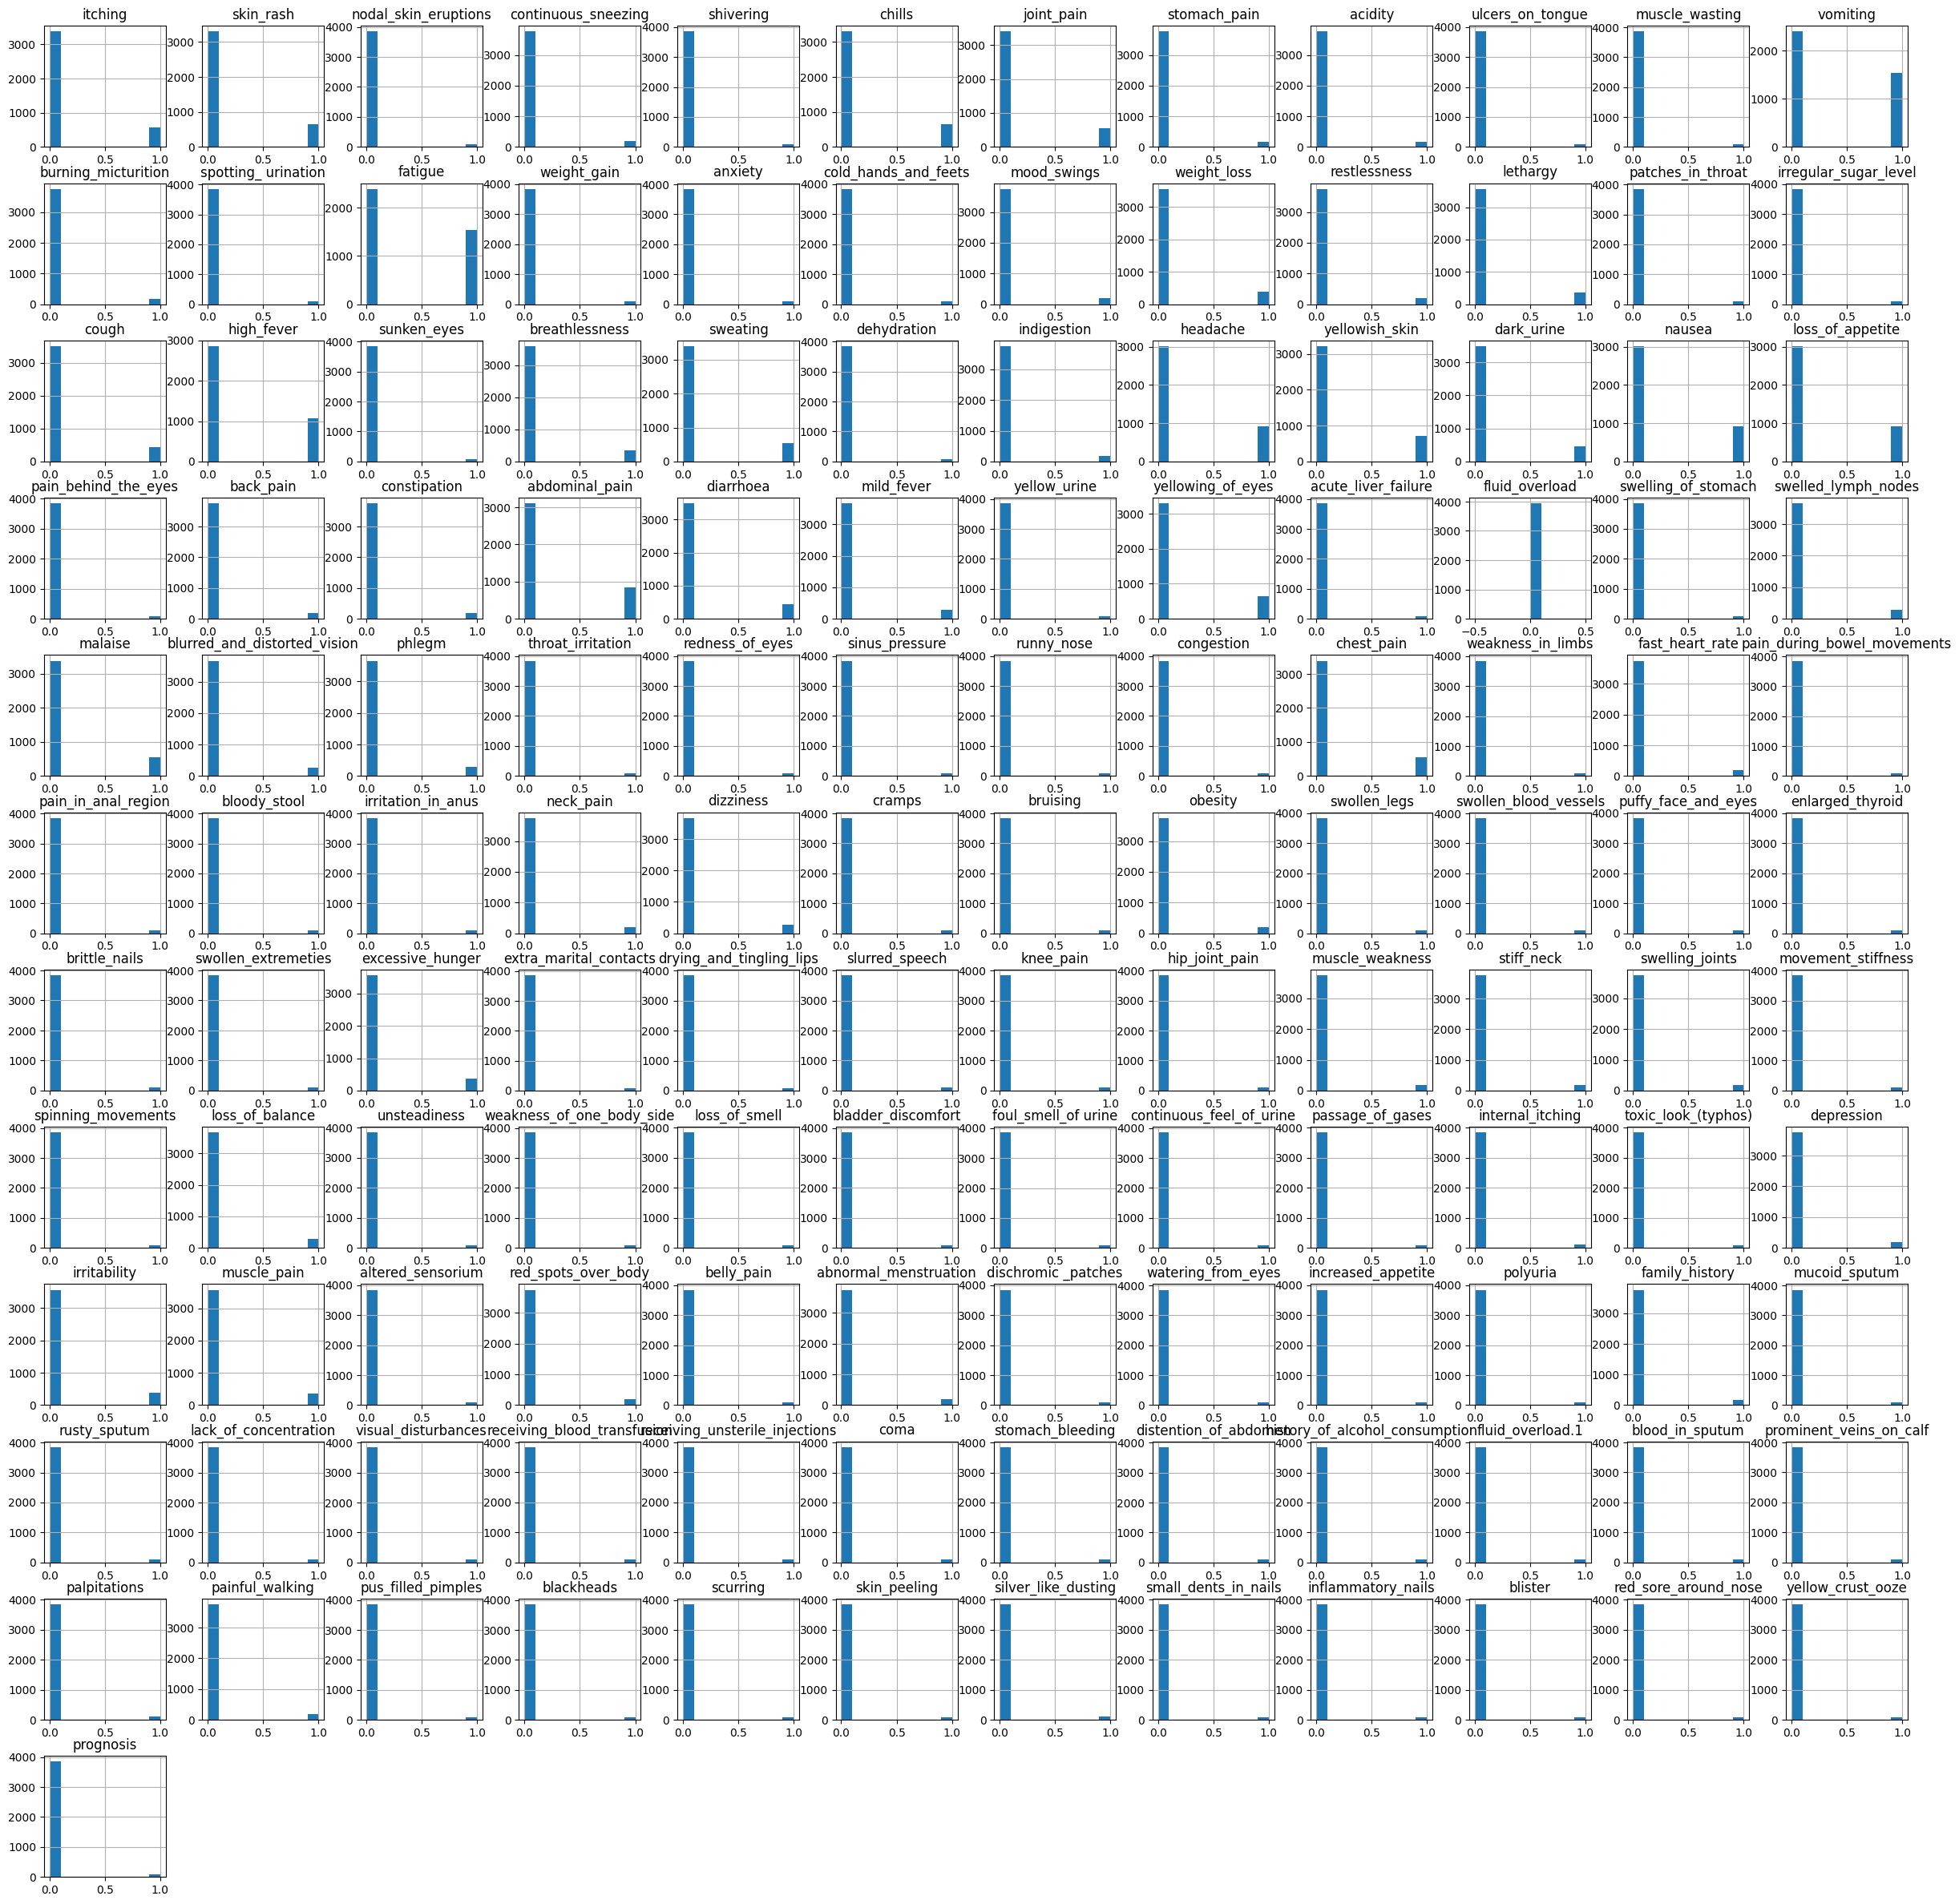

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=1.2, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)


training_set.hist(bins=10, figsize=(30,30))
plt.show()

In [8]:
print(training_set.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis               int64
Length: 133, dtype: object


In [9]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3936 entries, 1807 to 860
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 4.0 MB


In [10]:
training_set.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
training_set["prognosis"].value_counts()

prognosis
0    3841
1      95
Name: count, dtype: int64

## Explotary Data Analysis (EDA) for training data

In [12]:
### in order to this predict our objective is to predict the dengue is infected or not (classify the dengue infected or not)
    ### what attributes are so important for doing so
    ### to  do that we have to  do corrrelational analysis between the prognosis (dependent variable) (y)and other independent variables(x)

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
corr_matrix = training_set.corr()

In [15]:
corr_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.313121,0.333454,-0.088562,-0.061719,-0.179842,-0.163095,0.200870,-0.087244,-0.060634,-0.059531,-0.051708,0.199443,0.339042,0.064540,-0.064185,-0.061719,-0.064185,-0.090638,0.094190,-0.090638,0.300801,-0.059531,-0.064185,-0.143303,0.041083,-0.060634,-0.126502,-0.162046,-0.060269,-0.089864,-0.071411,0.310304,0.249882,-0.063280,0.238607,-0.063838,-0.089864,-0.090122,0.268566,-0.145898,0.144527,0.348257,0.180701,-0.060998,NaN,-0.062433,0.139120,0.216497,-0.111857,-0.112729,-0.064874,-0.064874,-0.064874,-0.064874,-0.064874,-0.164140,-0.061719,-0.090380,-0.060998,-0.060634,-0.060998,-0.060998,-0.091150,-0.110760,-0.063489,-0.063489,-0.090894,-0.063838,-0.062433,-0.063838,-0.065557,-0.065557,-0.065557,-0.131660,-0.059531,-0.061719,-0.063838,-0.063489,-0.063489,-0.091661,-0.090122,-0.091150,-0.064185,-0.062787,-0.112511,-0.065216,-0.061719,-0.064874,-0.061719,-0.059901,-0.062077,-0.064874,-0.065557,-0.064185,-0.092169,-0.133027,-0.131268,-0.062787,0.232083,-0.064874,-0.093179,0.335800,-0.061359,-0.065557,-0.065557,-0.087509,-0.059901,-0.063139,-0.062433,-0.062077,0.357257,0.357257,-0.062787,-0.062787,-0.062077,-0.062787,-0.062787,-0.064185,-0.064185,-0.063838,-0.090122,-0.060634,-0.060998,-0.060634,-0.063489,-0.063838,-0.063139,-0.063489,-0.062787,-0.062433,-0.062787,-0.064185
skin_rash,0.313121,1.000000,0.299314,-0.095441,-0.066513,-0.033143,0.180346,0.159317,-0.094021,-0.065344,-0.064156,-0.232344,0.157920,0.285614,-0.110732,-0.069171,-0.066513,-0.069171,-0.097678,-0.143150,-0.097678,0.063381,-0.064156,-0.069171,-0.154435,0.119726,-0.065344,-0.136329,-0.174634,-0.064950,-0.096844,0.046471,-0.208110,-0.157430,-0.097223,0.049444,0.337571,0.198602,-0.097123,-0.227885,-0.157232,0.117432,-0.066899,-0.193631,-0.065736,NaN,-0.067282,0.112223,0.172409,-0.120546,-0.121486,-0.069914,-0.069914,-0.069914,-0.069914,-0.069914,-0.176890,-0.066513,-0.097401,-0.065736,-0.065344,-0.065736,-0.065736,-0.098231,-0.119

In [16]:
corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              0.983751
back_pain                         0.698485
red_spots_over_body               0.647863
muscle_pain                       0.443530
joint_pain                        0.369526
malaise                           0.350111
skin_rash                         0.335105
chills                            0.334466
nausea                            0.280037
headache                          0.276528
loss_of_appetite                  0.276329
high_fever                        0.248809
vomiting                          0.175915
fatigue                           0.175303
red_sore_around_nose             -0.012983
blister                          -0.013179
yellow_crust_ooze                -0.013179
toxic_look_(typhos)              -0.013946
belly_pain                       -0.014321
patches_in_throat                -0.022940
muscle_wasting                   -0.022940
extra_marital_contacts           -0.022940
mucoid_sput

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='back_pain', ylabel='prognosis'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>,
        <Axes: xlabel='joint_pain', ylabel='prognosis'>,
        <Axes: xlabel='loss_of_appetite', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='back_pain'>,
        <Axes: xlabel='back_pain', ylabel='back_pain'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='back_pain'>,
        <Axes: xlabel='joint_pain', ylabel='back_pain'>,
        <Axes: xlabel='loss_of_appetite', ylabel='back_pain'>],
       [<Axes: xlabel='prognosis', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='back_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='pain_behind_the_eyes', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='joint_pain', ylabel='pain_behind_the_eyes'>,
        <Axes: xlabel='loss_of_appetite', ylabel='pain_behind_the_eyes'>],
       [<Axes: xlabel='prognosis', ylabel='jo

<Figure size 640x480 with 0 Axes>

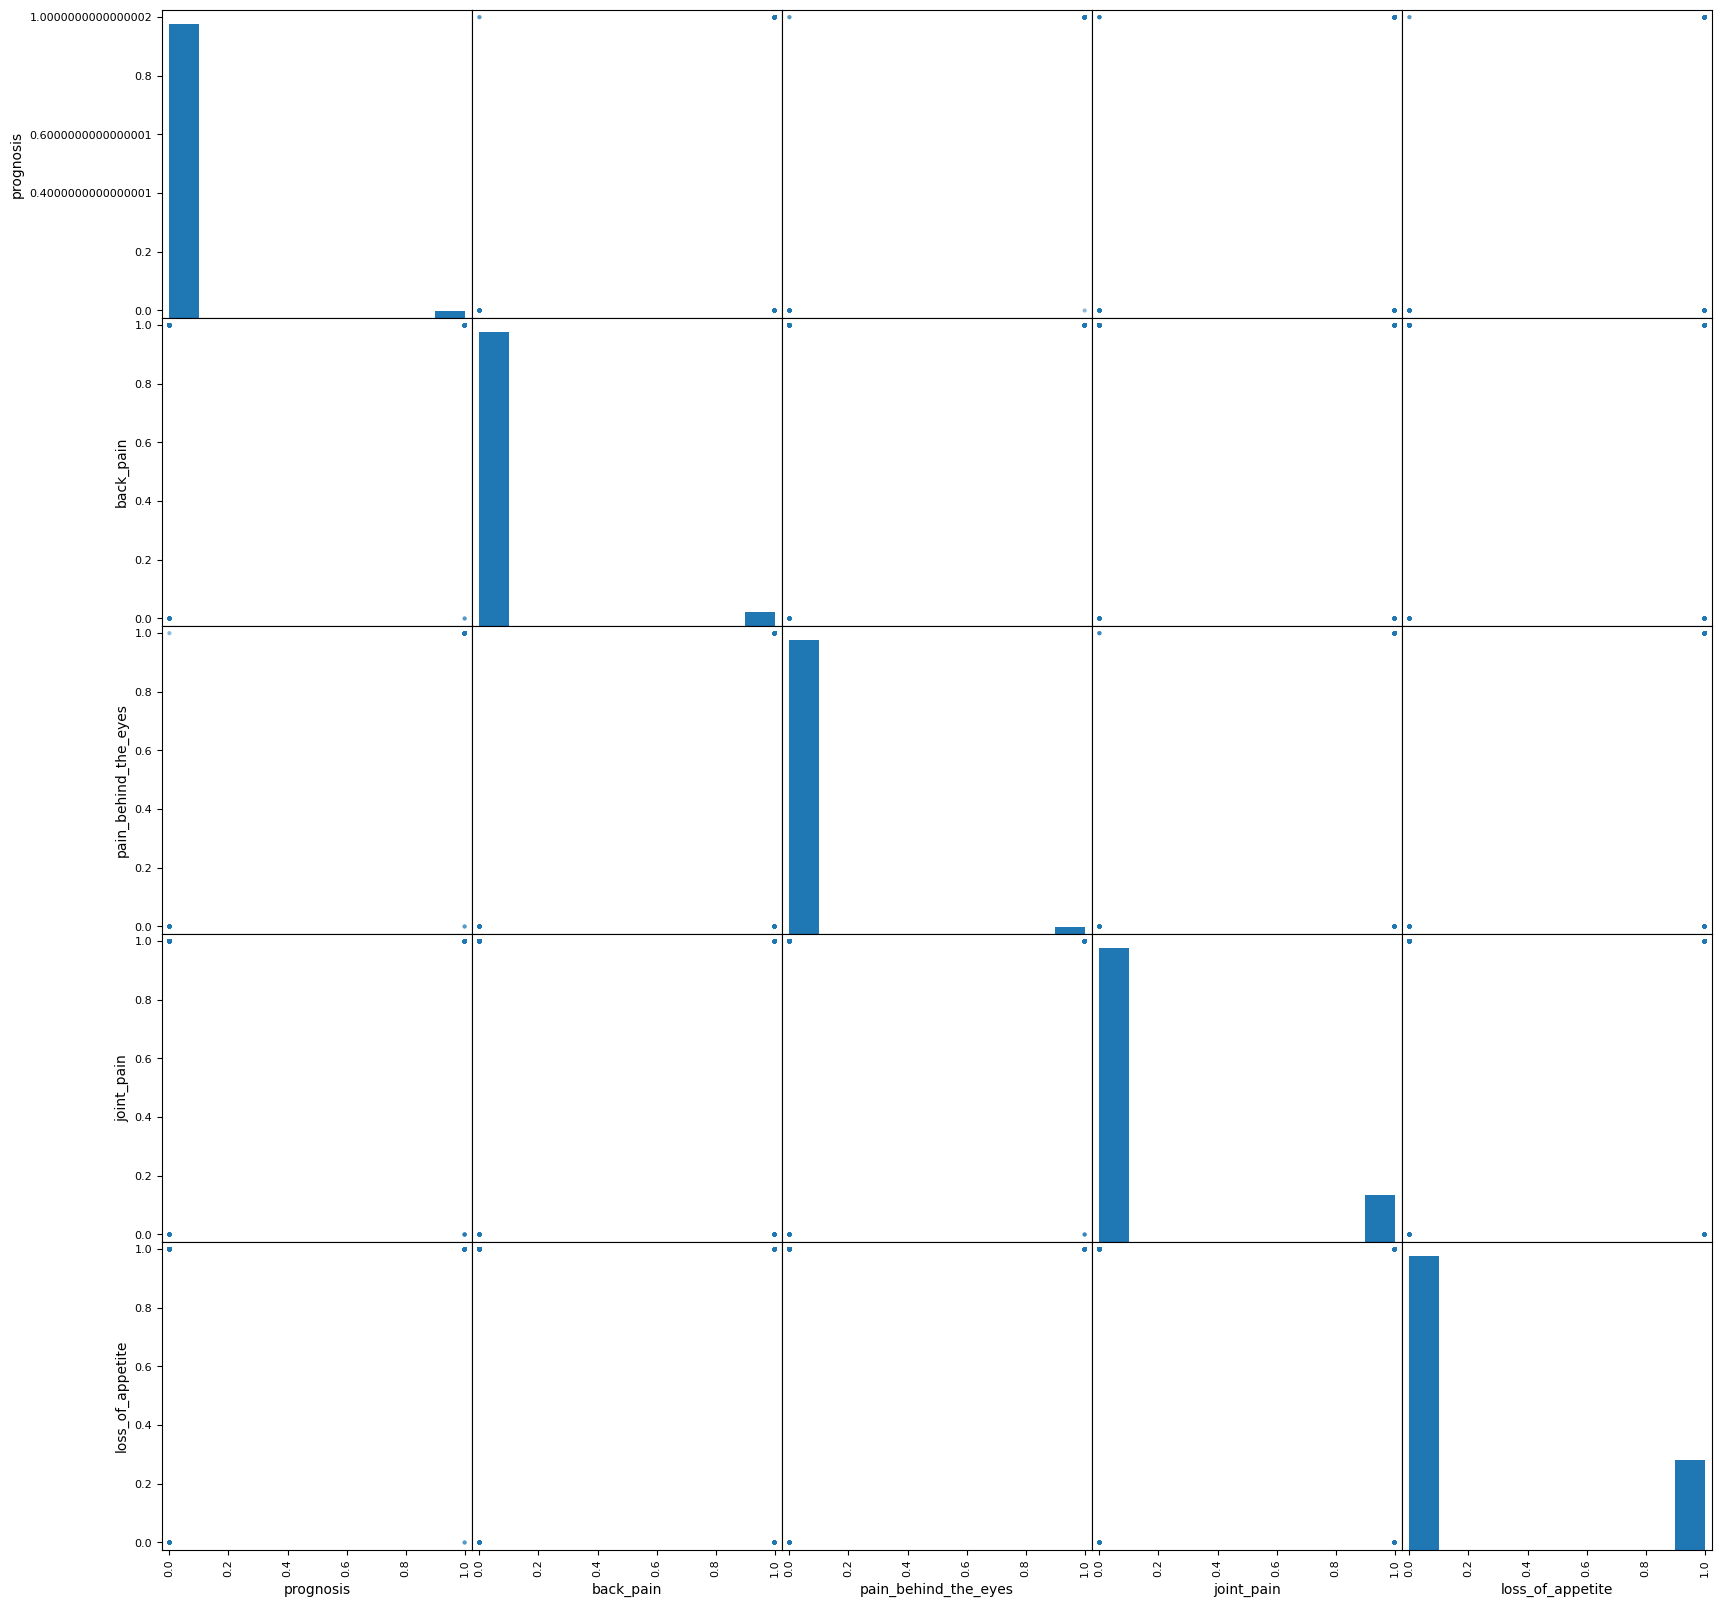

In [17]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","back_pain", "pain_behind_the_eyes","joint_pain","loss_of_appetite"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='malaise', ylabel='prognosis'>,
        <Axes: xlabel='red_spots_over_body', ylabel='prognosis'>,
        <Axes: xlabel='skin_rash', ylabel='prognosis'>,
        <Axes: xlabel='muscle_pain', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='malaise'>,
        <Axes: xlabel='malaise', ylabel='malaise'>,
        <Axes: xlabel='red_spots_over_body', ylabel='malaise'>,
        <Axes: xlabel='skin_rash', ylabel='malaise'>,
        <Axes: xlabel='muscle_pain', ylabel='malaise'>],
       [<Axes: xlabel='prognosis', ylabel='red_spots_over_body'>,
        <Axes: xlabel='malaise', ylabel='red_spots_over_body'>,
        <Axes: xlabel='red_spots_over_body', ylabel='red_spots_over_body'>,
        <Axes: xlabel='skin_rash', ylabel='red_spots_over_body'>,
        <Axes: xlabel='muscle_pain', ylabel='red_spots_over_body'>],
       [<Axes: xlabel='prognosis', ylabel='skin_rash'>,
        <Axes: xlabel='malaise'

<Figure size 640x480 with 0 Axes>

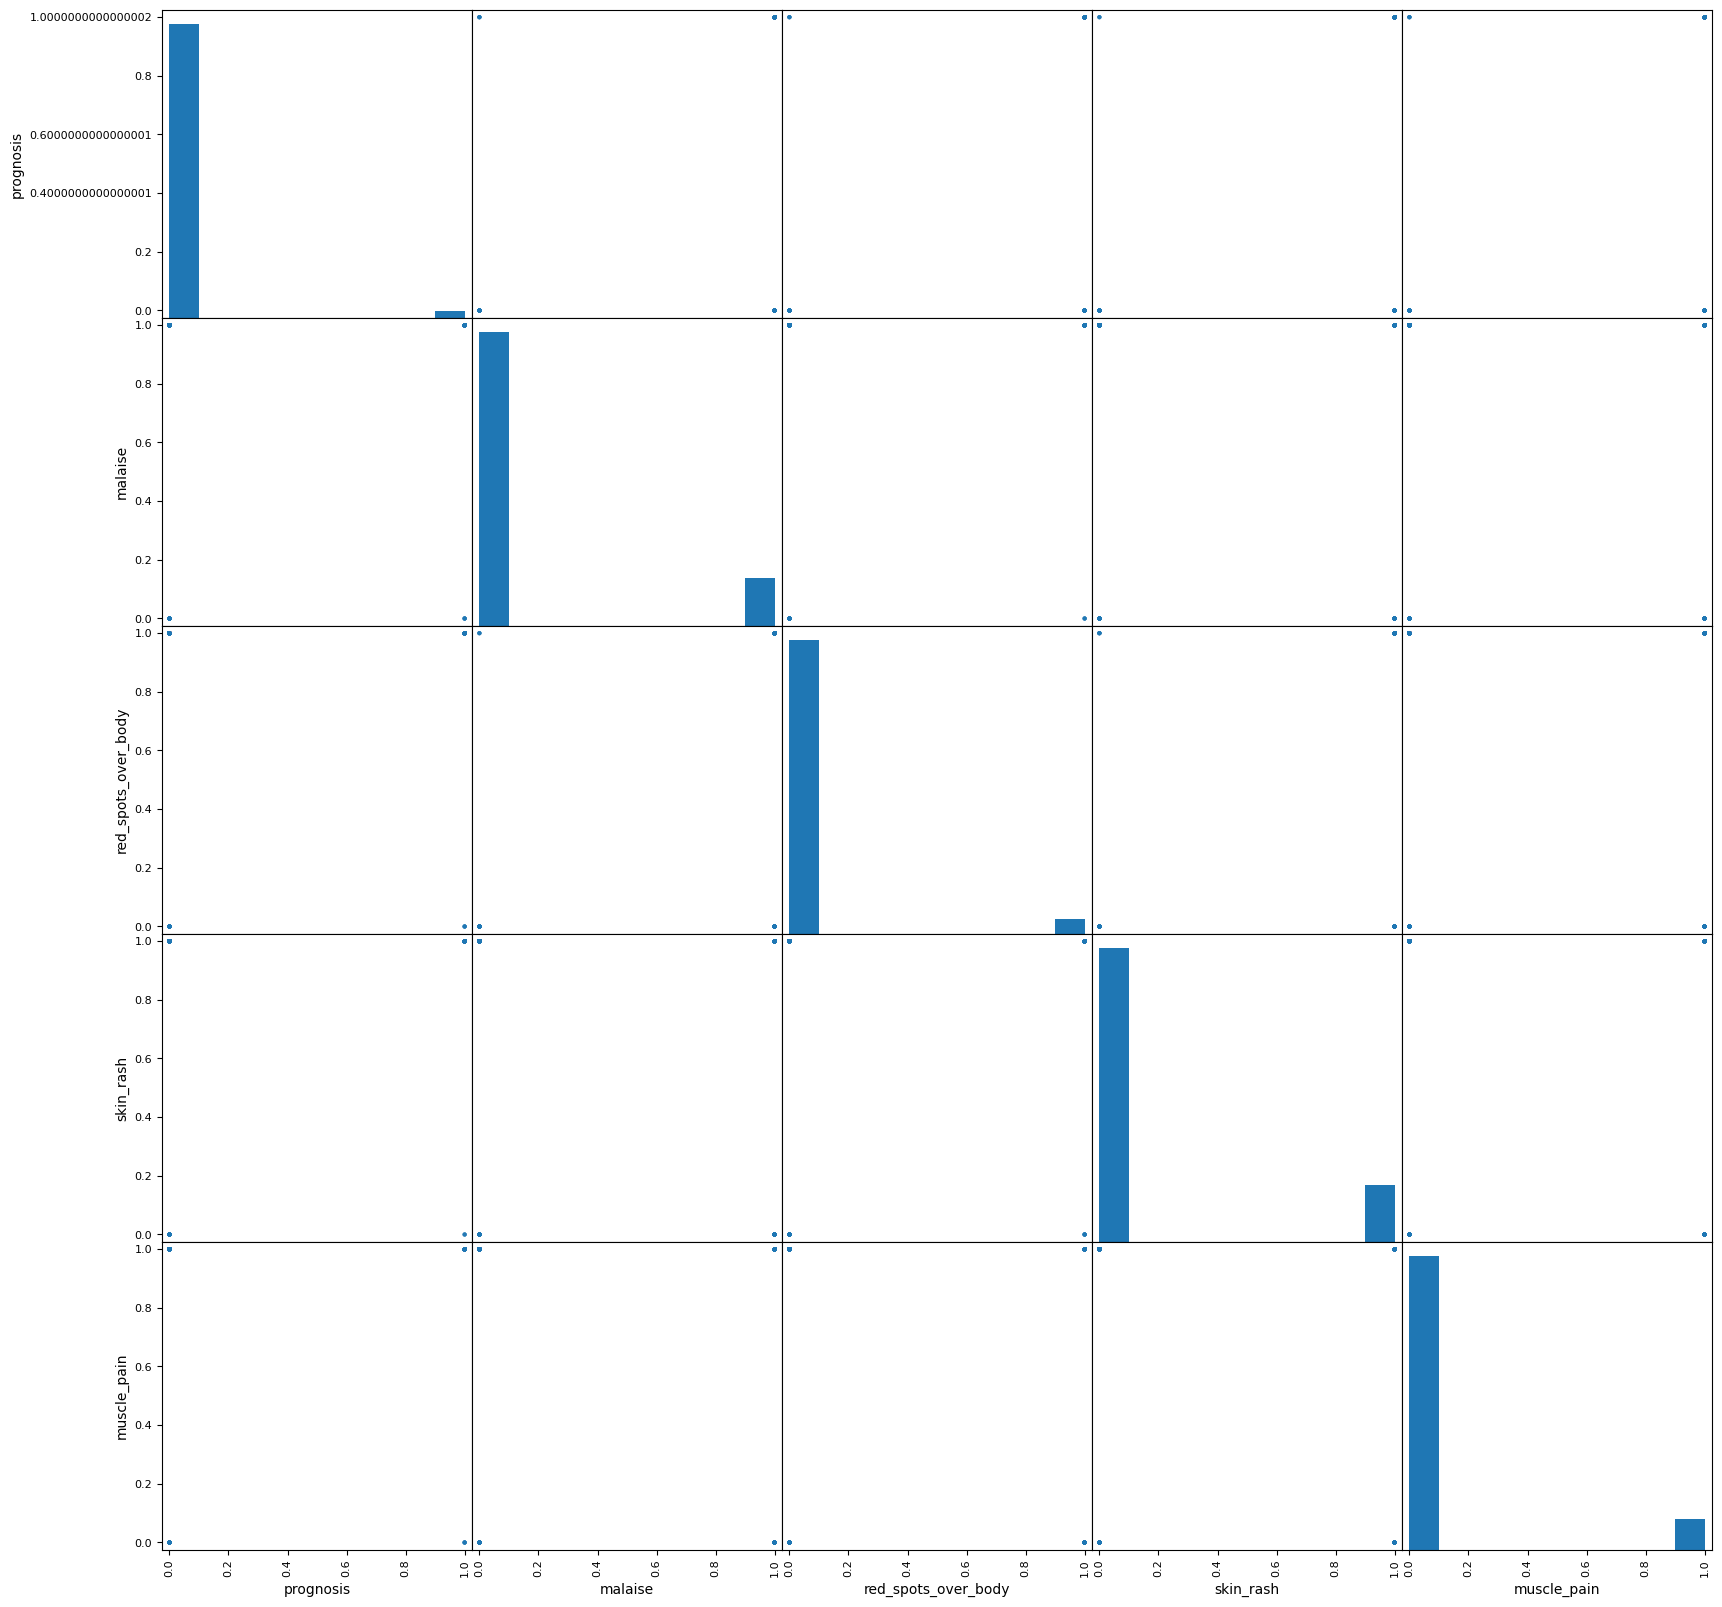

In [18]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","malaise","red_spots_over_body","skin_rash","muscle_pain",]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='fatigue', ylabel='prognosis'>,
        <Axes: xlabel='nausea', ylabel='prognosis'>,
        <Axes: xlabel='headache', ylabel='prognosis'>,
        <Axes: xlabel='vomiting', ylabel='prognosis'>,
        <Axes: xlabel='high_fever', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='fatigue'>,
        <Axes: xlabel='fatigue', ylabel='fatigue'>,
        <Axes: xlabel='nausea', ylabel='fatigue'>,
        <Axes: xlabel='headache', ylabel='fatigue'>,
        <Axes: xlabel='vomiting', ylabel='fatigue'>,
        <Axes: xlabel='high_fever', ylabel='fatigue'>],
       [<Axes: xlabel='prognosis', ylabel='nausea'>,
        <Axes: xlabel='fatigue', ylabel='nausea'>,
        <Axes: xlabel='nausea', ylabel='nausea'>,
        <Axes: xlabel='headache', ylabel='nausea'>,
        <Axes: xlabel='vomiting', ylabel='nausea'>,
        <Axes: xlabel='high_fever', ylabel='nausea'>],
       [<Axes: xlabel='prognosis', yl

<Figure size 640x480 with 0 Axes>

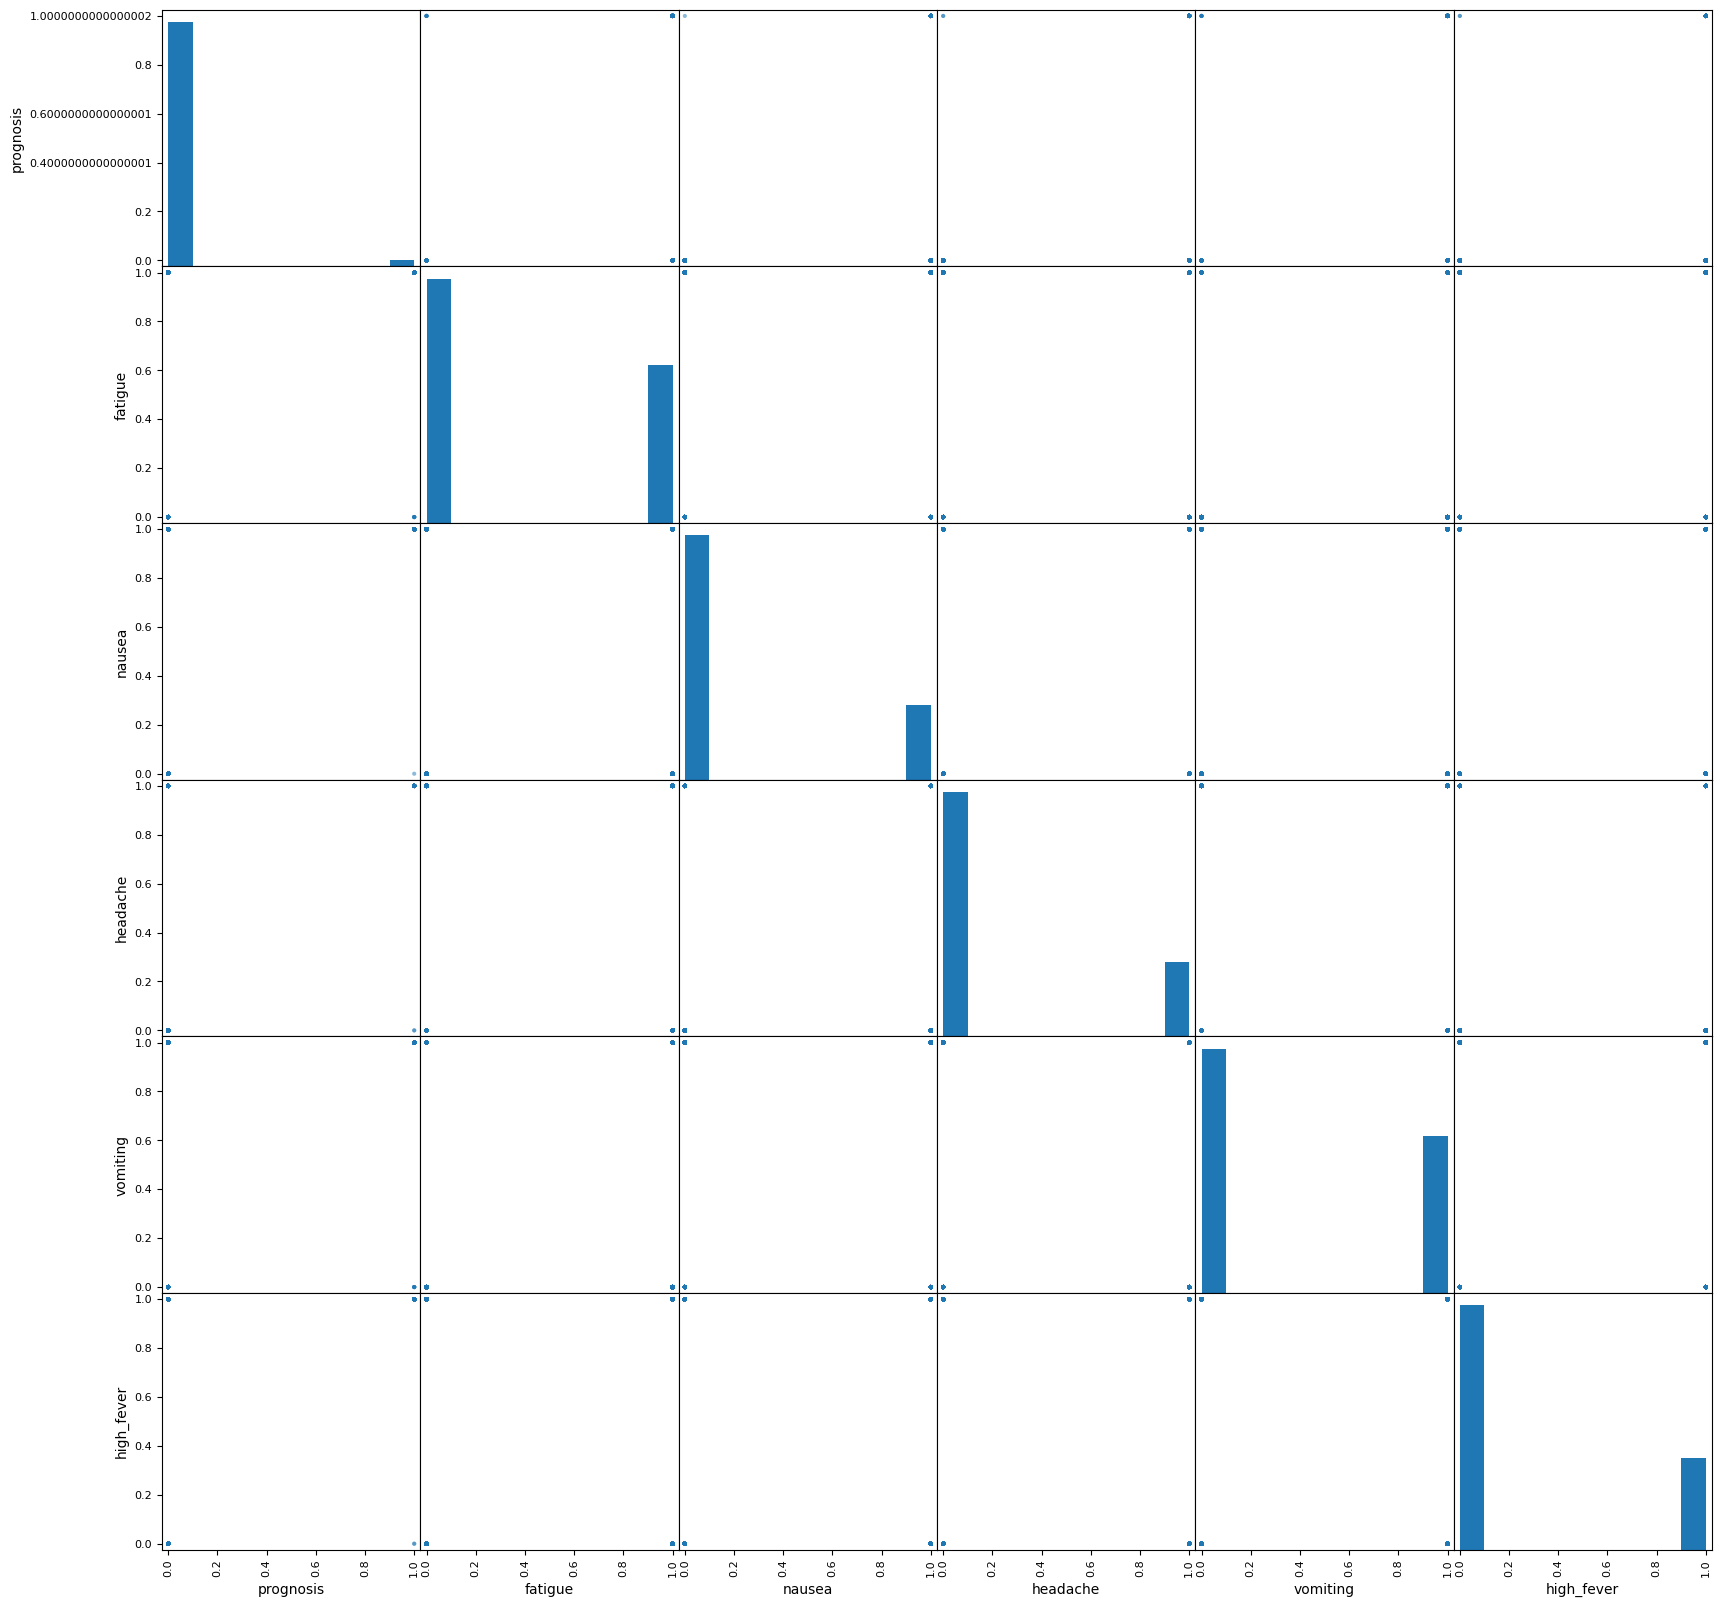

In [19]:
from pandas.plotting import scatter_matrix
plt.subplots_adjust(left=2.1, right=5.9, bottom=1.9, top=2.9, wspace=4.4, hspace=4.4)
attributes = ["prognosis","fatigue","nausea","headache","vomiting", "high_fever"]
scatter_matrix(training_set[attributes], figsize=(20,20))

array([[<Axes: xlabel='prognosis', ylabel='prognosis'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>,
        <Axes: xlabel='abdominal_pain', ylabel='prognosis'>,
        <Axes: xlabel='belly_pain', ylabel='prognosis'>,
        <Axes: xlabel='constipation', ylabel='prognosis'>,
        <Axes: xlabel='sweating', ylabel='prognosis'>,
        <Axes: xlabel='diarrhoea', ylabel='prognosis'>],
       [<Axes: xlabel='prognosis', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='toxic_look_(typhos)', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='abdominal_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='belly_pain', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='constipation', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='sweating', ylabel='toxic_look_(typhos)'>,
        <Axes: xlabel='diarrhoea', ylabel='toxic_look_(typhos)'>],
       [<Axes: xlabel='prognosis', ylabel='abdominal_pain'>,
        <Axes: xlabel='toxic_look_(typhos)', yl

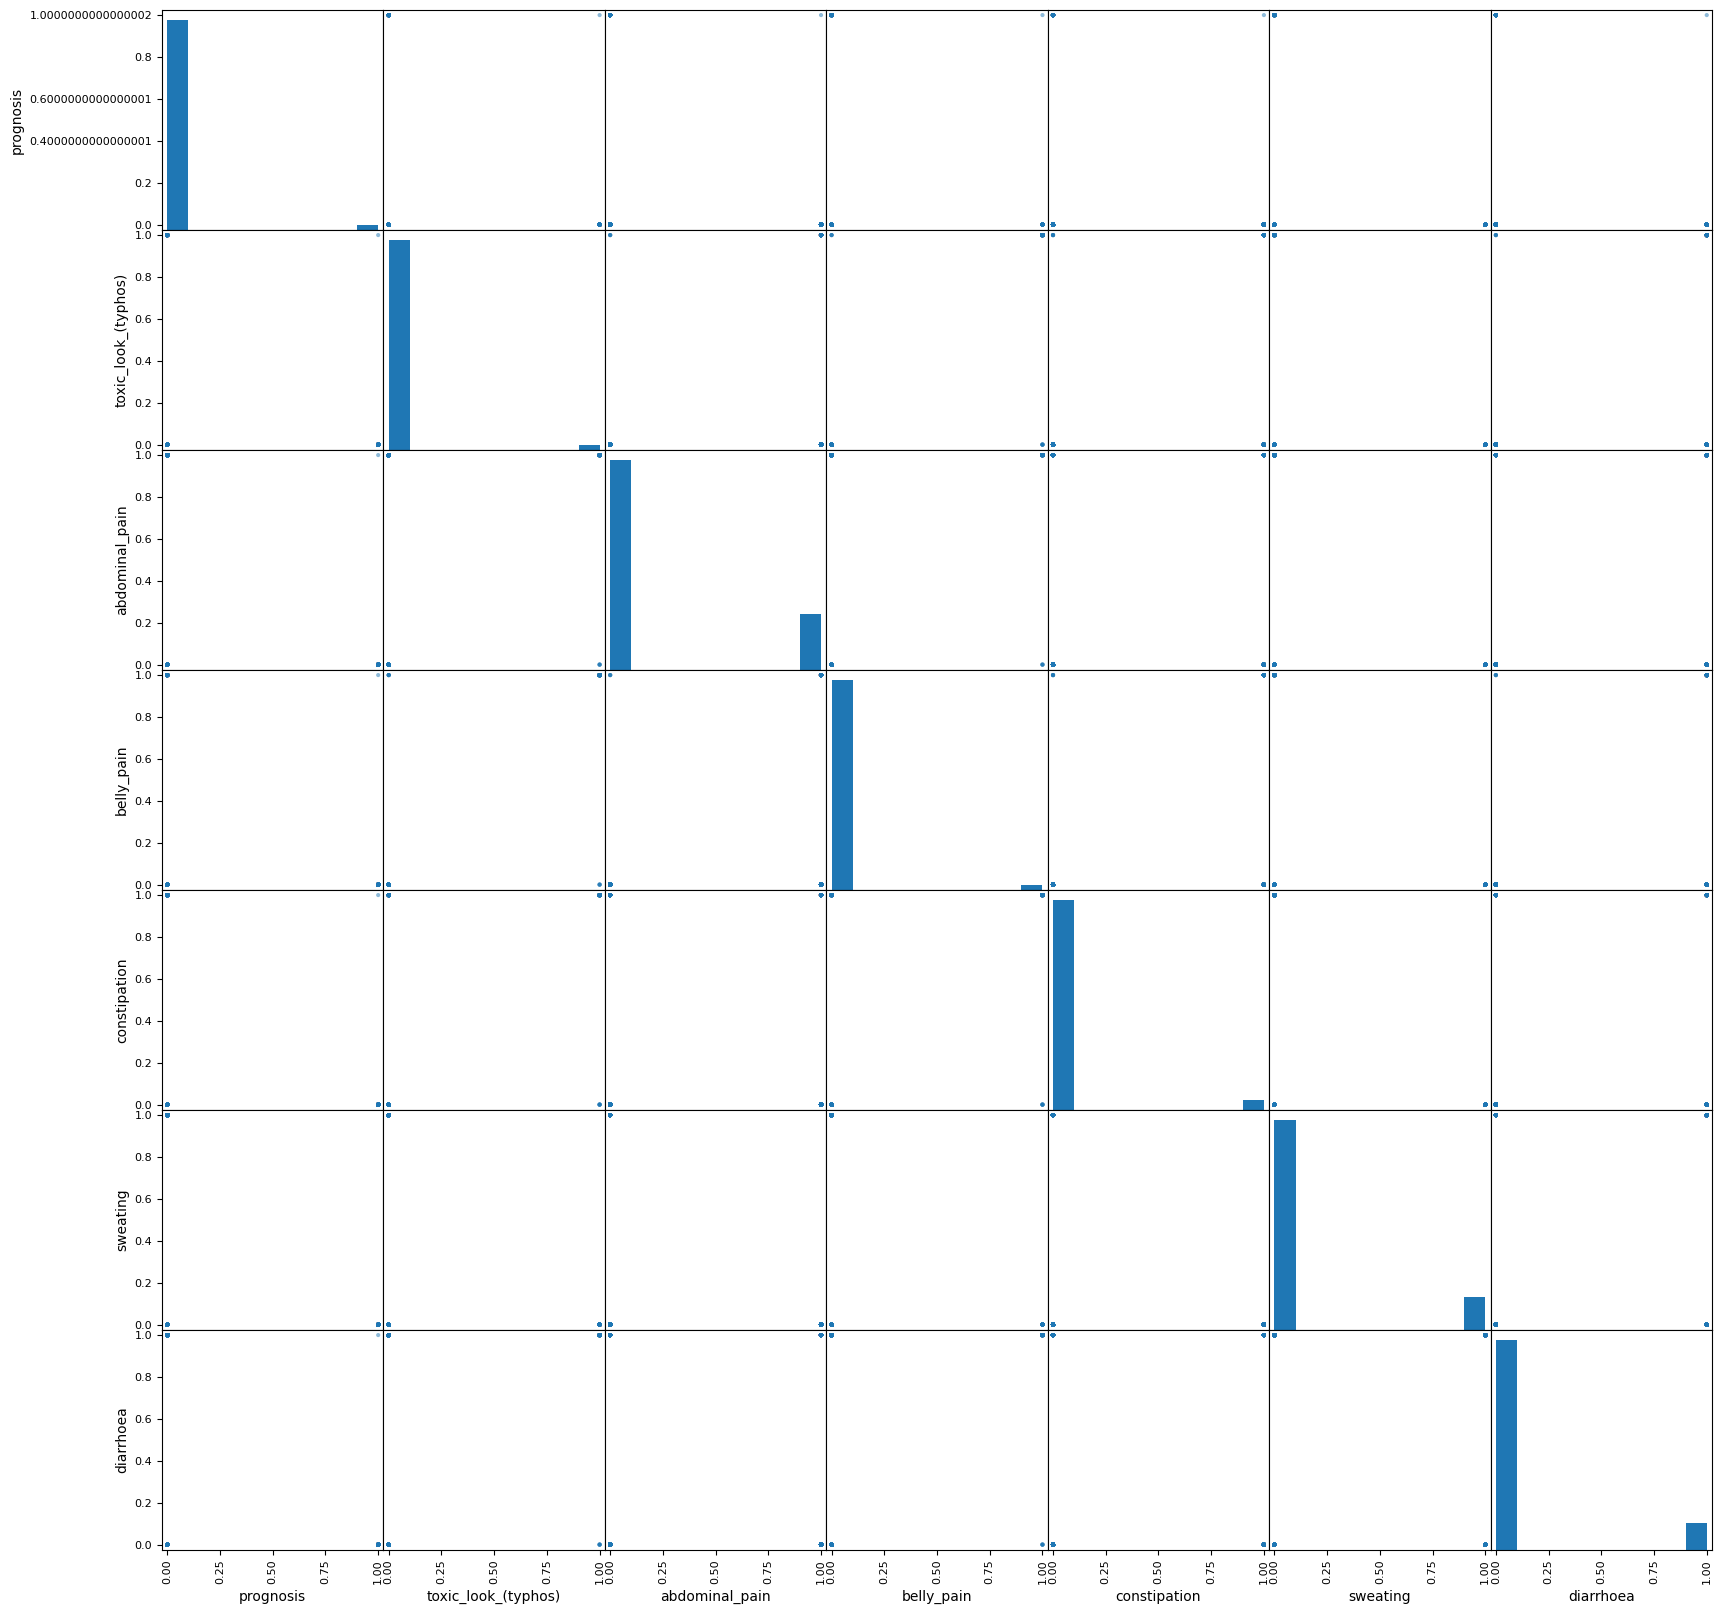

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["prognosis","toxic_look_(typhos)","abdominal_pain","belly_pain", "constipation", "sweating","diarrhoea"]
scatter_matrix(training_set[attributes], figsize=(20,20))

back_pain                         1.000000
pain_behind_the_eyes              1.000000
prognosis                         1.000000
joint_pain                        0.967934
loss_of_appetite                  0.954315
malaise                           0.915901
red_spots_over_body               0.915901
skin_rash                         0.625250
muscle_pain                       0.562421
fatigue                           0.544613
nausea                            0.406694
headache                          0.392534
vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='back_pain', ylabel='prognosis'>

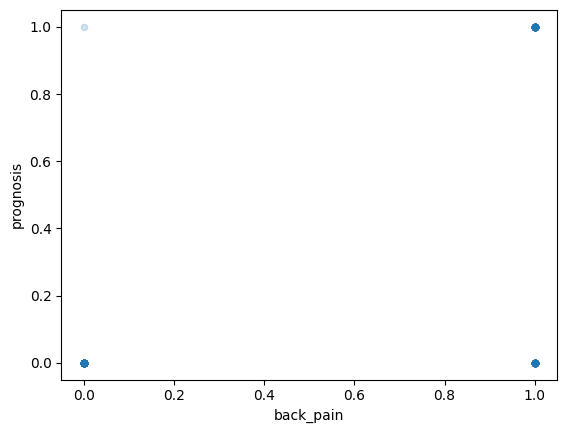

In [21]:
training_set.plot(kind="scatter", x="back_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='pain_behind_the_eyes', ylabel='prognosis'>

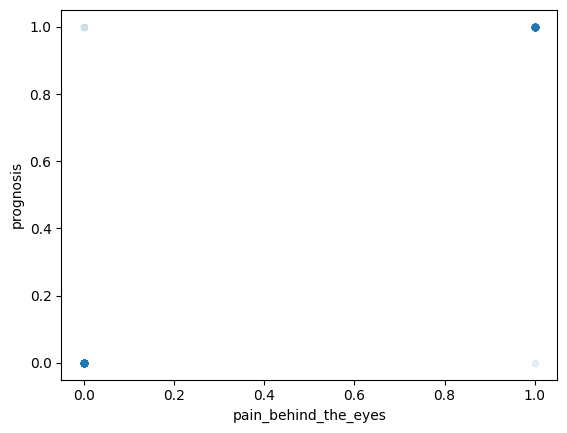

In [22]:
training_set.plot(kind="scatter", x="pain_behind_the_eyes", y="prognosis", alpha=0.1)

<Axes: xlabel='joint_pain', ylabel='prognosis'>

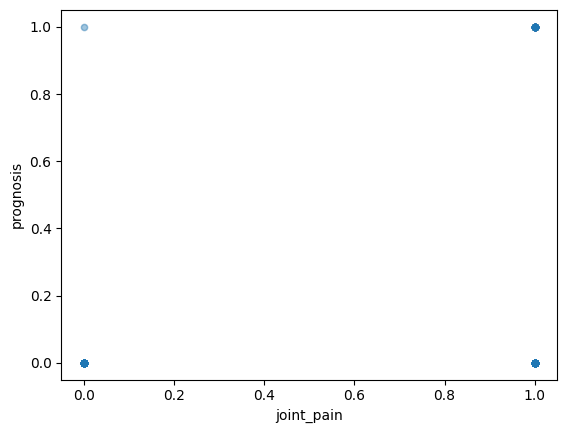

In [23]:
training_set.plot(kind="scatter", x="joint_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='loss_of_appetite', ylabel='prognosis'>

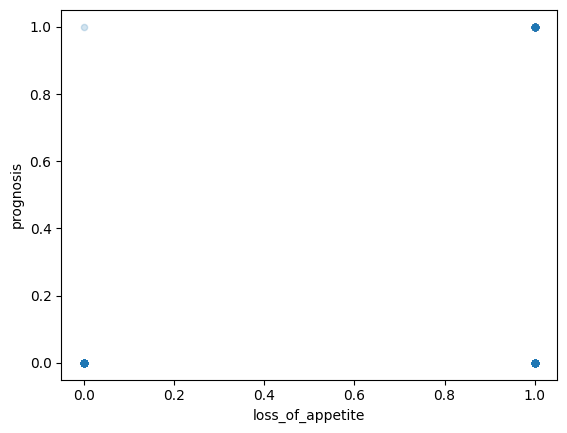

In [24]:
training_set.plot(kind="scatter", x="loss_of_appetite", y="prognosis", alpha=0.1)

<Axes: xlabel='malaise', ylabel='prognosis'>

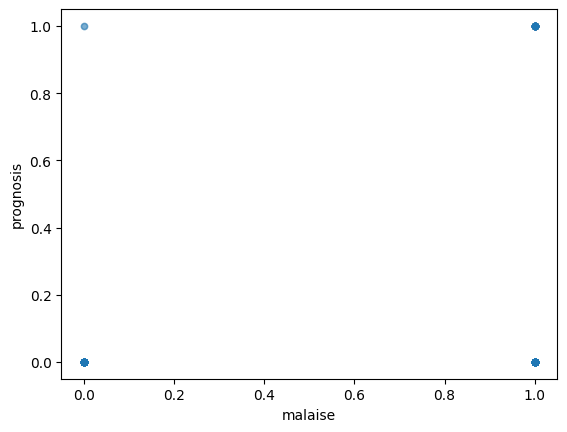

In [25]:
training_set.plot(kind="scatter", x="malaise", y="prognosis", alpha=0.1)

<Axes: xlabel='red_spots_over_body', ylabel='prognosis'>

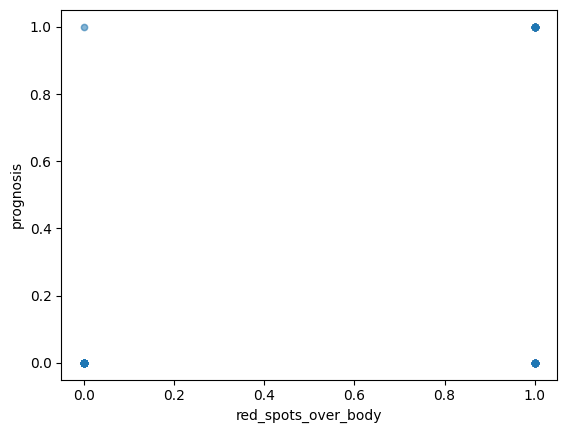

In [26]:
training_set.plot(kind="scatter", x="red_spots_over_body", y="prognosis", alpha=0.1)

<Axes: xlabel='skin_rash', ylabel='prognosis'>

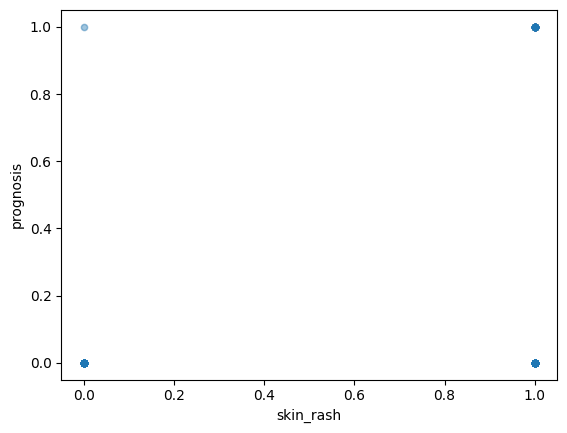

In [27]:
training_set.plot(kind="scatter", x="skin_rash", y="prognosis", alpha=0.1)

<Axes: xlabel='muscle_pain', ylabel='prognosis'>

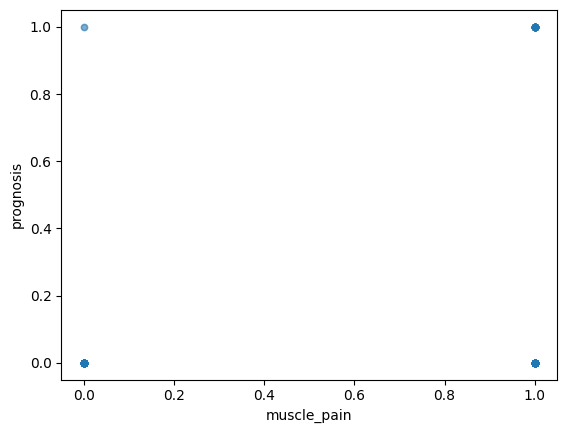

In [28]:
training_set.plot(kind="scatter", x="muscle_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='fatigue', ylabel='prognosis'>

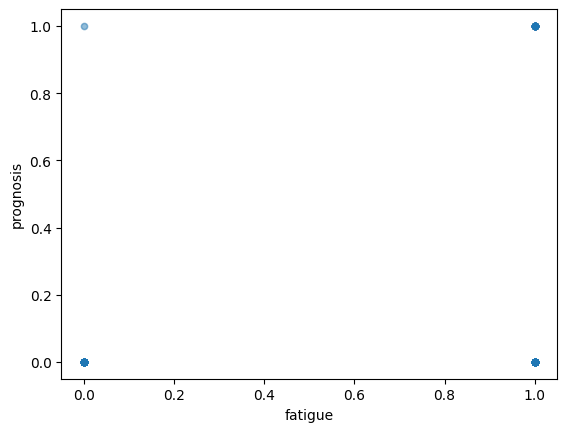

In [29]:
training_set.plot(kind="scatter", x="fatigue", y="prognosis", alpha=0.1)

<Axes: xlabel='nausea', ylabel='prognosis'>

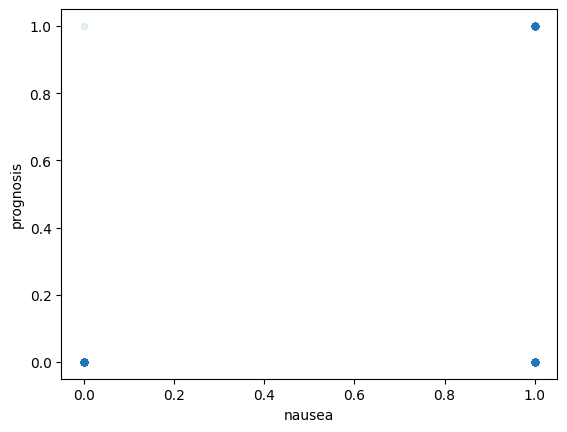

In [30]:
training_set.plot(kind="scatter", x="nausea", y="prognosis", alpha=0.1)

<Axes: xlabel='headache', ylabel='prognosis'>

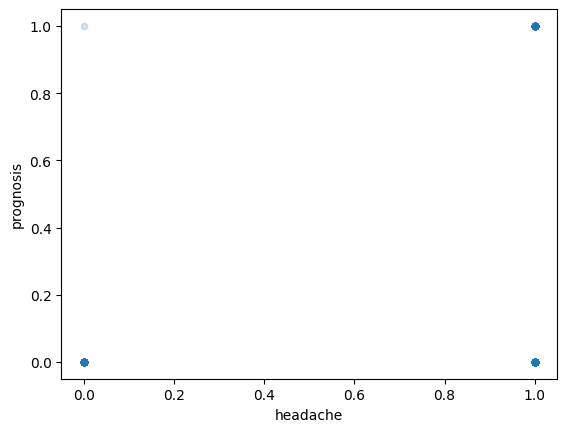

In [31]:
training_set.plot(kind="scatter", x="headache", y="prognosis", alpha=0.1)

vomiting                          0.361855
high_fever                        0.337278
toxic_look_(typhos)              -0.267750
abdominal_pain                   -0.267750
belly_pain                       -0.267750
constipation                     -0.267750
sweating                         -0.269251
diarrhoea                        -0.430851

<Axes: xlabel='vomiting', ylabel='prognosis'>

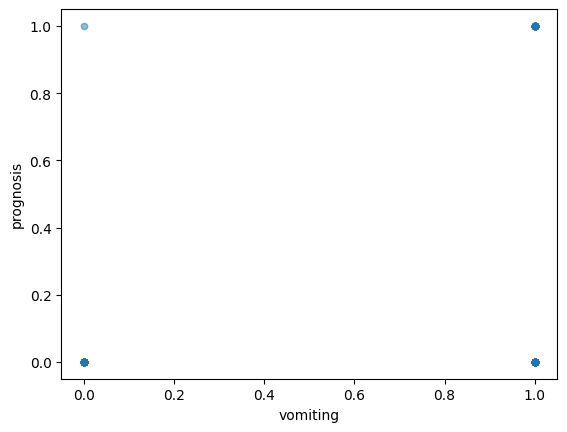

In [32]:
training_set.plot(kind="scatter", x="vomiting", y="prognosis", alpha=0.1)

<Axes: xlabel='high_fever', ylabel='prognosis'>

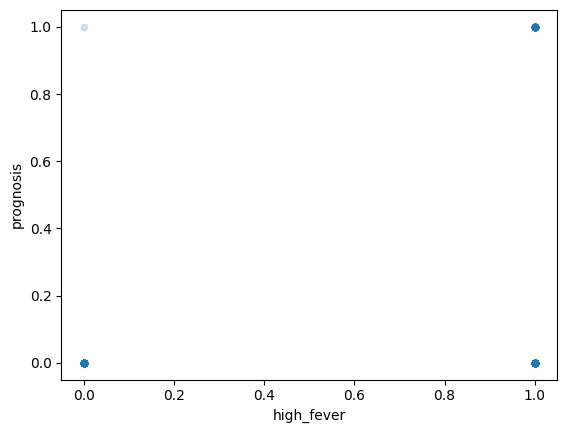

In [33]:
training_set.plot(kind="scatter", x="high_fever", y="prognosis", alpha=0.1)

<Axes: xlabel='toxic_look_(typhos)', ylabel='prognosis'>

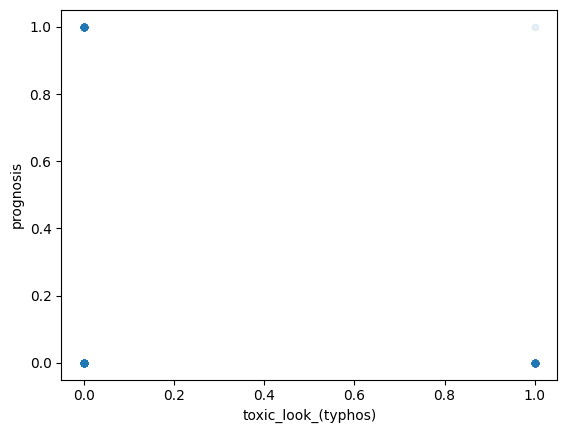

In [34]:
training_set.plot(kind="scatter", x="toxic_look_(typhos)", y="prognosis", alpha=0.1)

<Axes: xlabel='abdominal_pain', ylabel='prognosis'>

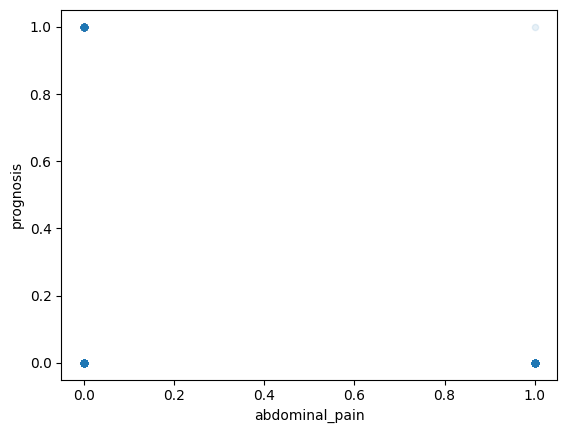

In [35]:
training_set.plot(kind="scatter", x="abdominal_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='belly_pain', ylabel='prognosis'>

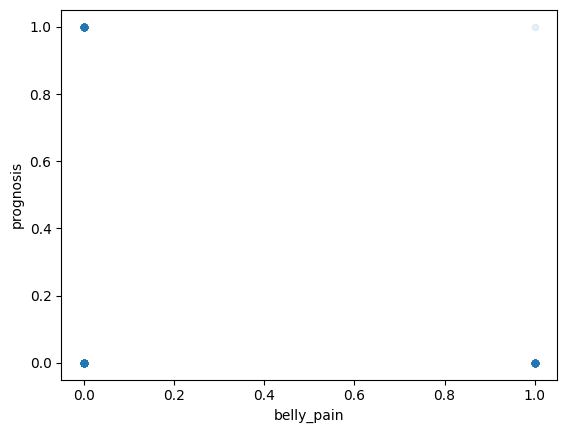

In [36]:
training_set.plot(kind="scatter", x="belly_pain", y="prognosis", alpha=0.1)

<Axes: xlabel='constipation', ylabel='prognosis'>

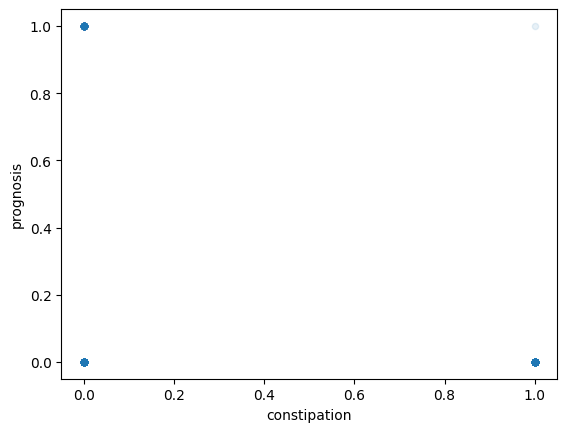

In [37]:
training_set.plot(kind="scatter", x="constipation", y="prognosis", alpha=0.1)

<Axes: xlabel='sweating', ylabel='prognosis'>

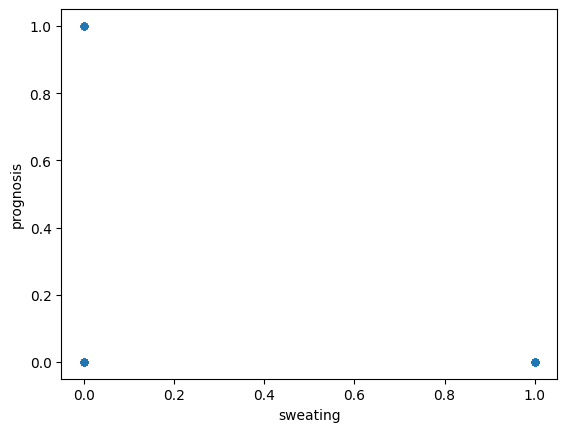

In [38]:
training_set.plot(kind="scatter", x="sweating", y="prognosis", alpha=0.1)

<Axes: xlabel='diarrhoea', ylabel='prognosis'>

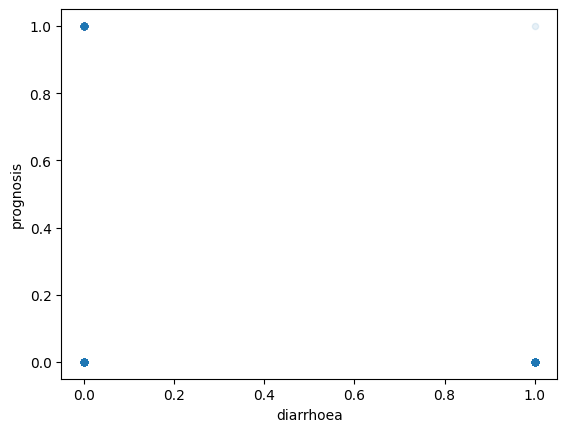

In [39]:
training_set.plot(kind="scatter", x="diarrhoea", y="prognosis", alpha=0.1)                                             

## Preparing the DataSet ML for (Machine Learning) Models

In [40]:
training_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1807,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
410,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
## our objective is predict dengue. in that case prognosis variable is already available. so then we can use the supervised learning method
 ## seperate the label and rest of the data

In [42]:
training_set_data = training_set.drop("prognosis", axis=1)

training_set_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1807,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
410,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
training_set_data_label = training_set["prognosis"].copy()
training_set_data_label

1807    0
184     0
205     0
4581    0
410     0
1049    0
2598    0
4272    0
3084    0
3658    0
305     0
4509    0
3169    0
4754    0
964     0
168     0
3690    0
4053    0
2874    0
3425    0
843     0
2540    0
4686    0
4758    0
2748    0
3653    0
2775    0
2361    0
211     0
4604    0
84      0
4712    0
3245    0
3615    0
679     0
2750    0
1025    0
1144    0
3447    0
565     0
3976    0
3483    0
680     0
180     1
2585    0
2103    0
2251    0
4209    0
278     0
1052    0
1210    0
432     0
289     0
1027    0
535     0
3887    0
188     0
4545    0
3809    0
1538    0
270     0
3398    0
3965    0
3918    0
3595    0
111     0
2436    0
220     0
627     0
2940    0
3265    0
2512    0
790     0
1870    0
461     0
4335    0
551     0
2168    0
1095    0
198     0
3838    0
402     0
3095    0
3001    0
4690    0
2101    0
3692    0
4395    0
650     0
708     0
1419    0
4347    0
4213    0
2706    0
4147    0
314     0
2015    0
4407    0
113     0
960     0


In [44]:
len(training_set_data_label)

3936

In [45]:
training_set_data_label.isnull().sum()

0

In [46]:
## Data Cleaning

In [47]:
### check  any particular missing values are there

In [48]:
len(training_set_data)

3936

In [49]:
training_set_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [50]:
### According to the above dataset missing values are not there then we dont need filling the missing values

In [51]:
training_set_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1807,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
410,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
len(training_set_data)

3936

In [53]:
len(training_set_data_label)

3936

In [54]:
columns_to_drop = ['itching','stomach_pain', 'lethargy', 'sweating', 'abdominal_pain', 'continuous_sneezing', 'shivering', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
                   'constipation', 'belly_pain', 'watering_from_eyes', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
                   'nodal_skin_eruptions', 'continuous_sneezing', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',                                
                  'red_sore_around_nose', 'yellow_crust_ooze', 'dischromic _patches', 'diarrhoea', 'mild_fever', 'swelled_lymph_nodes', 'toxic_look_(typhos)']

training_set_data.drop(columns=columns_to_drop, inplace=True)

In [55]:
training_prepared_data_new_pd=training_set_data
training_prepared_data_new_pd.head(10)

,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1807,1,0,1,1,0,0,0,0,1,0,1
184,0,1,1,1,1,0,0,0,0,0,0
205,0,0,0,0,0,1,0,0,1,0,0
4581,0,0,0,0,0,0,0,0,0,0,0
410,1,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,1,1,0,0,0,0,0
2598,0,1,1,1,1,0,0,0,0,1,0
4272,0,0,0,0,0,0,0,0,0,0,0
3084,0,0,1,0,0,0,0,0,0,0,0
3658,0,0,1,0,0,0,0,0,0,0,0


# Model selecting and training

In [56]:
from sklearn.model_selection import train_test_split

# Splitting train set into the training and validation set
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)



In [57]:
X_train_pd = pd.DataFrame(X_train, columns=training_set_data.columns)
X_train_pd.head()

,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1265,0,0,0,0,1,0,0,0,0,0,0
984,1,0,1,1,0,1,0,0,1,0,1
3592,0,1,1,0,0,1,0,0,1,0,0
1637,1,0,1,0,0,0,0,0,0,0,0
3790,0,1,1,1,1,0,0,0,0,0,0


In [58]:
Y_train_pd = pd.DataFrame(y_train)
Y_train_pd.head()

,prognosis
1265,0
984,0
3592,0
1637,0
3790,0


In [59]:
 #Import models
from sklearn.tree import DecisionTreeClassifier
Dt_clf = DecisionTreeClassifier(random_state=42)
Dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:

Dt_value_predictions = Dt_clf.predict(X_test)
Dt_value_accuracy = accuracy_score(y_test, Dt_value_predictions)
print(f"\nValidation Accuracy: {Dt_value_accuracy:.4f}")


Validation Accuracy: 0.9987


In [61]:
# Performance Measure Of Your Model

In [62]:

mse_Of_Dt = mean_squared_error(y_test, Dt_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Dt:.4f}")

Mean Squared Error (MSE): 0.0013


In [63]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(random_state=42)
Rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
Rf_value_predictions = Rf_clf.predict(X_test)
Rf_value_accuracy = accuracy_score(y_test, Rf_value_predictions)
print(f"\nValidation Accuracy: {Rf_value_accuracy:.4f}")


Validation Accuracy: 0.9987


In [65]:
# Performance Mesure Of Your Model

In [66]:
mse_Of_Rf = mean_squared_error(y_test, Rf_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Rf:.4f}")

Mean Squared Error (MSE): 0.0013


In [67]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=42)
LR_clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [68]:
Lr_value_predictions = LR_clf.predict(X_test)
Lr_value_accuracy = accuracy_score(y_test, Lr_value_predictions)
print(f"\nValidation Accuracy: {Lr_value_accuracy:.4f}")


Validation Accuracy: 0.9987


In [69]:
 #Performance Mesure Of Your Model

In [70]:
mse_Of_Lr = mean_squared_error(y_test, Lr_value_predictions)
print(f"Mean Squared Error (MSE): {mse_Of_Lr:.4f}")

Mean Squared Error (MSE): 0.0013


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def modelEvaluation(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("Logistic Regression")
LR_accuracy = modelEvaluation(LR_clf, X_test, y_test)

print("Decision Tree")
DT_accuracy = modelEvaluation(Dt_clf , X_test, y_test)

print("Random Forest classifier")
RF_accuracy = modelEvaluation(Rf_clf, X_test, y_test)

# Now you have the accuracy scores stored in variables for later use
print(f"LR Accuracy: {LR_accuracy:.4f}")
print(f"DT Accuracy: {DT_accuracy:.4f}")
print(f"RF Accuracy: {RF_accuracy:.4f}")

Logistic Regression
Accuracy: 0.9987
Precision: 0.9987
Recall: 0.9987
F1 Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      0.94      0.97        16

    accuracy                           1.00       788
   macro avg       1.00      0.97      0.98       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[772   0]
 [  1  15]]
Decision Tree
Accuracy: 0.9987
Precision: 0.9987
Recall: 0.9987
F1 Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      0.94      0.97        16

    accuracy                           1.00       788
   macro avg       1.00      0.97      0.98       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[772   0]
 [  1  15]]
Random Forest classifier
Accuracy: 0.9987
Prec

## Handle the overfitting issue

In [72]:

corr_matrix["prognosis"].sort_values(ascending=False)

prognosis                         1.000000
pain_behind_the_eyes              0.983751
back_pain                         0.698485
red_spots_over_body               0.647863
muscle_pain                       0.443530
joint_pain                        0.369526
malaise                           0.350111
skin_rash                         0.335105
chills                            0.334466
nausea                            0.280037
headache                          0.276528
loss_of_appetite                  0.276329
high_fever                        0.248809
vomiting                          0.175915
fatigue                           0.175303
red_sore_around_nose             -0.012983
blister                          -0.013179
yellow_crust_ooze                -0.013179
toxic_look_(typhos)              -0.013946
belly_pain                       -0.014321
patches_in_throat                -0.022940
muscle_wasting                   -0.022940
extra_marital_contacts           -0.022940
mucoid_sput

In [73]:
#Remove the unnecessary coloumns

In [74]:

training_prepared_data_new_pd.head(10)

,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1807,1,0,1,1,0,0,0,0,1,0,1
184,0,1,1,1,1,0,0,0,0,0,0
205,0,0,0,0,0,1,0,0,1,0,0
4581,0,0,0,0,0,0,0,0,0,0,0
410,1,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,1,1,0,0,0,0,0
2598,0,1,1,1,1,0,0,0,0,1,0
4272,0,0,0,0,0,0,0,0,0,0,0
3084,0,0,1,0,0,0,0,0,0,0,0
3658,0,0,1,0,0,0,0,0,0,0,0


In [75]:
training_prepared_data_new_pd.head(5)


,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1807,1,0,1,1,0,0,0,0,1,0,1
184,0,1,1,1,1,0,0,0,0,0,0
205,0,0,0,0,0,1,0,0,1,0,0
4581,0,0,0,0,0,0,0,0,0,0,0
410,1,0,0,0,0,0,0,0,0,0,0


In [76]:
## Save the newly created training dataset in .csv file

In [77]:
training_prepared_data_new_pd.head()

,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1807,1,0,1,1,0,0,0,0,1,0,1
184,0,1,1,1,1,0,0,0,0,0,0
205,0,0,0,0,0,1,0,0,1,0,0
4581,0,0,0,0,0,0,0,0,0,0,0
410,1,0,0,0,0,0,0,0,0,0,0


In [78]:
len(training_prepared_data_new_pd)

3936

In [79]:
training_prepared_data_new_pd.head()

,skin_rash,chills,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body
1807,1,0,1,1,0,0,0,0,1,0,1
184,0,1,1,1,1,0,0,0,0,0,0
205,0,0,0,0,0,1,0,0,1,0,0
4581,0,0,0,0,0,0,0,0,0,0,0
410,1,0,0,0,0,0,0,0,0,0,0


In [80]:
# check the null values

In [81]:
training_prepared_data_new_pd.isnull().sum()

skin_rash               0
chills                  0
high_fever              0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
dtype: int64

In [82]:
## Get the length of the training dataset

In [83]:
import numpy as np
np.size(training_prepared_data_new_pd)

43296

## Hyper Parameter Tuning

In [84]:
## Hyper parameter tuning for Logistic regression



In [85]:
len(training_set_data_label)

3936

In [86]:
len(training_prepared_data_new_pd)

3936

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Assuming you have your own dataset loaded into DataFrame named 'training_new_dataset_pd' and 'training_set_data_label'
#training_new_dataset_pd,training_set_data_label= make_classification(n_samples=451, n_features=11, n_informative=2, n_classes=2, random_state=42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Instantiate logistic regression model with default parameters
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the test set
test_set_predictions = logreg_model.predict(X_test)

# Evaluate model performance with default parameters
accuracy = accuracy_score(y_test, test_set_predictions)
print("Accuracy with Default Parameters:", accuracy)

# Manually tune parameters
# Example: Setting regularization parameter C=0.1 and penalty='l2'
logreg_model_tuned = LogisticRegression(C=0.1, penalty='l2')

# Fit the model with tuned parameters on the training data
logreg_model_tuned.fit(X_train, y_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test,test_set_predictions)
precision = precision_score(y_test,test_set_predictions, average='weighted')
recall = recall_score(y_test,test_set_predictions, average='weighted')
f1 = f1_score(y_test, test_set_predictions, average='weighted')

print("Logistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, test_set_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_set_predictions))

# Predictions on the test set with tuned parameters
test_set_predictions_tuned = logreg_model_tuned.predict(X_test)

# Evaluate model performance with tuned parameters
accuracy_tuned = accuracy_score(y_test, test_set_predictions_tuned)
print("Accuracy with Tuned Parameters:", accuracy_tuned)



Accuracy with Default Parameters: 0.998730964467005
Logistic Regression Classifier Metrics:
Accuracy: 0.9987
Precision: 0.9987
Recall: 0.9987
F1 Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      0.94      0.97        16

    accuracy                           1.00       788
   macro avg       1.00      0.97      0.98       788
weighted avg       1.00      1.00      1.00       788


Confusion Matrix:
[[772   0]
 [  1  15]]
Accuracy with Tuned Parameters: 0.998730964467005


In [ ]:
## Hyper parameter tuning for Decision Tree model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Decision Tree Classifier with Regularization (Pruning)
# Adjust hyperparameters to avoid overfitting
dt_clf = DecisionTreeClassifier(max_depth=1000, min_samples_split=1000, random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Predictions on the test set
dt_test_pred = dt_clf.predict(X_test)

# Calculate evaluation metrics
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
precision = precision_score(y_test, dt_test_pred, average='weighted')
recall = recall_score(y_test, dt_test_pred, average='weighted')
f1 = f1_score(y_test, dt_test_pred, average='weighted')

print("DecisionTree Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, dt_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_test_pred))


# Calculate MSE and RMSE for Decision Tree
mse_dt = mean_squared_error(y_test, dt_test_pred)
rmse_dt = np.sqrt(mse_dt)

# Print Results
print("Decision Tree Validation Accuracy:", dt_test_accuracy)
print(f"Decision Tree Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Decision Tree Root Mean Squared Error (RMSE): {rmse_dt:.4f}")




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_error
import numpy as np

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mse_RF = mean_squared_error(y_test, y_pred)
rmse_RF = np.sqrt(mse_RF)
print(f"\nRandom Forest Mean Squared Error (MSE): {mse_RF:.4f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_RF:.4f}")


## Ensemble method( Technique)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier



# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training_prepared_data_new_pd, training_set_data_label, test_size=0.2, random_state=42)

# Define base estimators (individual models)
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('logistic_regression', LogisticRegression(C=0.1, random_state=42)),
    ('random_forest', RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42))
]

# Create the Voting Classifier
voting_clf = VotingClassifier(estimators, voting='hard')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Introduce more randomness to reduce accuracy
np.random.seed(42)
rand_indices = np.random.choice(len(y_pred), size=int(len(y_pred) * 0.2), replace=False)
y_pred[rand_indices] = np.random.choice(np.unique(y_test), size=len(rand_indices))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Ensemble (Voting) Classifier Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate MSE and RMSE for Decision Tree
mse_voting_clf = mean_squared_error(y_test, y_pred)
rmse_voting_clf = np.sqrt(mse_voting_clf)
print(f"\n Ensemble voting classifier Mean Squared Error (MSE): {mse_voting_clf:.4f}")
print(f" Ensemble voting classifier  Root Mean Squared Error (RMSE): {rmse_voting_clf:.4f}")




In [ ]:
# Selecting best model
# Accuracy ensemble method (voting) -  0.9035532994923858(90%), random forest - 0.998730964467005 (100%), logistic_regression - 0.998730964467005 (%)
# Among the models logistic regression is the best model  and also  prefered algorithm is random forest algorithm/model

In [ ]:
# Consider the test set

In [ ]:
test_data = test_set
test_data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots_adjust(left=1.1, right=6.9, bottom=1.1, top=1.9, wspace=4.4, hspace=4.4)


test_data.hist(bins=10, figsize=(30,30))
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

test_data.isnull().sum()

## Explotary Data Analysis (EDA) for testing data

In [ ]:
#cheching the null  values of test dataset

In [ ]:
test_data.isnull().sum()

In [ ]:
# Remove the unnecessary columns

In [ ]:
columns_to_drop = ['itching','stomach_pain', 'lethargy', 'sweating', 'abdominal_pain', 'continuous_sneezing', 'shivering', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue',
                   'constipation', 'belly_pain', 'watering_from_eyes', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
                   'nodal_skin_eruptions', 'continuous_sneezing', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'weight_gain', 'anxiety', 'cold_hands_and_feets',                 
                  'mood_swings', 'weight_loss', 'restlessness', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'sunken_eyes', 'breathlessness', 'dehydration', 'indigestion', 'yellowish_skin',                         
                  'dark_urine', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pain_in_anal_region',
                  'bloody_stool', 'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails',                         
                  'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 'swelling_joints',
                  'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',                       
                  'internal_itching', 'depression', 'irritability', 'altered_sensorium', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
                  'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',                        
                  'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister',                                
                  'red_sore_around_nose', 'yellow_crust_ooze', 'dischromic _patches', 'diarrhoea', 'mild_fever', 'swelled_lymph_nodes', 'toxic_look_(typhos)', 'prognosis']


test_data.drop(columns=columns_to_drop, inplace=True)



In [ ]:
testing_prepared_dataset_new_pd =test_data
testing_prepared_dataset_new_pd.head()

In [ ]:
# check the null values again

In [ ]:
testing_prepared_dataset_new_pd.isnull().sum()

In [ ]:
testing_prepared_dataset_new_pd.head()

skin_rash               0
nodal_skin_             0
continuous_sneezing     0
shivering               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
lethargy                0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
constipation            0
abdominal_pain          0
diarrhoea               0
mild_fever              0
swelled_lymph_nodes     0
malaise                 0
toxic_look_(typhos)     0
muscle_pain             0
red_spots_over_body     0
belly_pain              0
dischromic _patches     0
watering_from_eyes      0
Temp                    0
dtype: int64

In [ ]:
testing_prepared_dataset_new_pd.head()

In [ ]:
# Extract the symptoms columns from the testing dataset
test_symptoms_column = testing_prepared_dataset_new_pd[["skin_rash","chills","high_fever",
                                                      "headache", "nausea", "loss_of_appetite", "pain_behind_the_eyes", "back_pain", "malaise", 
                                                     "muscle_pain", "red_spots_over_body"]]


# Predictions on the test set
test_set_predictions = voting_clf.predict( testing_prepared_dataset_new_pd)

# Create submission DataFrame
submission_df = pd.DataFrame({
    "skin_rash": test_symptoms_column.iloc[:, 0],  
    "chills": test_symptoms_column.iloc[:, 1],  
    "high_fever": test_symptoms_column.iloc[:, 2],
    "headache": test_symptoms_column.iloc[:, 3],
    "nausea": test_symptoms_column.iloc[:, 4],
    "loss_of_appetite": test_symptoms_column.iloc[:, 5],
    "pain_behind_the_eyes": test_symptoms_column.iloc[:, 6],
    "back_pain": test_symptoms_column.iloc[:, 7],
    "malaise": test_symptoms_column.iloc[:, 8],
    "muscle_pain": test_symptoms_column.iloc[:, 9],
    "red_spots_over_body": test_symptoms_column.iloc[:, 10],
    "Prognosis": test_set_predictions
})

# Save submission DataFrame to CSV file
submission_df.to_csv('submission.csv', index=False)
print(submission_df)


In [ ]:
#0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1
# 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
# 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0   

pred = voting_clf.predict([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

if pred[0] == 0:
  print("Dengue is not infected")
else:
  print("Dengue is infected")

In [ ]:
# Import the pickle file

# create pikel file
import pickle

pickle.dump(voting_clf, open('./DengueDetectionModel.h5', 'wb'))